# Set environment

In [1]:
# # http://pytorch.org/
# from os.path import exists
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [2]:
# !git clone https://github.com/gilbertolem/ProgGen

In [3]:
# from os import chdir, getcwd
# chdir("ProgGen")
# from sys import path
# path.append(getcwd())

# Train

In [4]:
import torch
import utils.data_tools as data_tools
from utils.nets import ProgGen
from pickle import load, dump
import matplotlib.pyplot as plt

xml_directory = "XML_Tunes/"
torch.manual_seed(999)
use_gpu = torch.cuda.is_available()

In [5]:
# Load vocabulary
words_text2num = load(open("maps/words_text2num.txt",'rb'))
vocab_size = len(words_text2num)

# Create training data
filters = {'author':'Charlie Parker', 'style':None}
X_train, X_val = data_tools.musicxml2tensor(xml_directory, words_text2num, filters = filters) # (Seq x Batch x vocab_size)
train_data = data_tools.TuneData(X_train)
val_data = data_tools.TuneData(X_val)


CREATING TENSORS FROM MUSICXML FILES...
	297 tunes succesfully loaded for training.
	75 tunes succesfully loaded for validation.


In [6]:
# Construct Neural Net
input_size = vocab_size
hidden_size = 256
num_layers = 1
dropout = 0
model = ProgGen(input_size, hidden_size, num_layers, dropout)
loss_fn = torch.nn.CrossEntropyLoss()

# Define loader
sampler = torch.utils.data.RandomSampler(train_data)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 372, sampler = sampler, num_workers = 1 if use_gpu else 4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 372, num_workers = 1 if use_gpu else 4)

if use_gpu:
    model = model.cuda()
    loss_fn = loss_fn.cuda()

In [7]:
# Define loss function and optimizer
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [8]:
from utils.training import train
epochs = 500
losses = train(epochs, model, optim, train_loader, val_loader, loss_fn, use_gpu)


--------------------------------------------------------------------
TRAINING MODEL... 

   Epoch | Training Loss | Val. Loss
     0.0 |          5.58 |      5.26
     1.0 |          5.28 |       3.3
     2.0 |          3.38 |      3.36
     3.0 |          3.58 |      3.27
     4.0 |          3.37 |      3.28
     5.0 |          3.32 |      3.24
     6.0 |          3.32 |      3.15
     7.0 |          3.29 |       3.1
     8.0 |          3.27 |       3.1
     9.0 |           3.3 |      3.09
    10.0 |          3.27 |      3.07
    11.0 |          3.22 |      3.09
    12.0 |          3.21 |      3.12
    13.0 |          3.21 |      3.12
    14.0 |          3.22 |      3.09
    15.0 |           3.2 |      3.05
    16.0 |          3.19 |      3.02
    17.0 |          3.18 |       3.0
    18.0 |          3.17 |      2.98
    19.0 |          3.14 |      2.96
    20.0 |          3.14 |      2.96
    21.0 |          3.13 |      2.95
    22.0 |          3.11 |      2.93
    23.0 |          3.

   218.0 |          1.22 |      1.54
   219.0 |          1.22 |      1.52
   220.0 |          1.21 |      1.49
   221.0 |           1.2 |      1.47
   222.0 |          1.19 |      1.46
   223.0 |          1.19 |      1.47
   224.0 |          1.18 |      1.47
   225.0 |          1.18 |      1.49
   226.0 |          1.18 |       1.5
   227.0 |          1.18 |      1.51
   228.0 |          1.18 |      1.49
   229.0 |          1.17 |       1.5
   230.0 |          1.17 |      1.49
   231.0 |          1.18 |      1.47
   232.0 |          1.16 |      1.49
   233.0 |          1.16 |       1.5
   234.0 |          1.16 |      1.49
   235.0 |          1.15 |       1.5
   236.0 |          1.17 |      1.44
   237.0 |          1.15 |      1.43
   238.0 |          1.17 |      1.48
   239.0 |          1.17 |      1.59
   240.0 |           1.2 |      1.66
   241.0 |          1.22 |      1.68
   242.0 |          1.18 |      1.68
   243.0 |          1.19 |      1.63
   244.0 |          1.18 |      1.55
 

   440.0 |          0.88 |      1.71
   441.0 |          0.88 |      1.76
   442.0 |           0.9 |      1.76
   443.0 |          0.88 |      1.74
   444.0 |          0.88 |       1.7
   445.0 |          0.89 |      1.65
   446.0 |          0.92 |      1.67
   447.0 |           0.9 |      1.72
   448.0 |           0.9 |      1.74
   449.0 |          0.92 |      1.69
   450.0 |          0.88 |      1.67
   451.0 |          0.89 |      1.66
   452.0 |          0.88 |      1.66
   453.0 |          0.88 |      1.68
   454.0 |           0.9 |      1.69
   455.0 |          0.87 |      1.68
   456.0 |          0.86 |      1.68
   457.0 |          0.87 |      1.69
   458.0 |          0.87 |      1.69
   459.0 |          0.86 |      1.69
   460.0 |          0.85 |      1.68
   461.0 |          0.85 |      1.69
   462.0 |          0.88 |      1.69
   463.0 |          0.87 |      1.68
   464.0 |          0.87 |      1.67
   465.0 |          0.87 |      1.67
   466.0 |          0.87 |      1.67
 

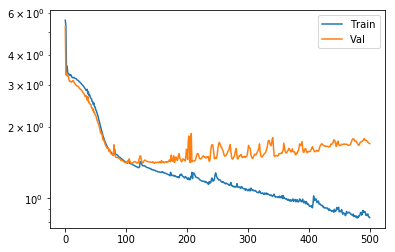

0.830776572227478
1.6979910135269165


In [15]:
plt.semilogy(losses[0], label='Train')
plt.semilogy(losses[1], label='Val')
plt.legend()
plt.show()
import numpy as np
print(losses[0][-1])
print(losses[1][-1])

# Generate something

In [10]:
from generating import generate_progression

model_name = "model"
initial_chord = "4C_maj"
tune_len = 32
top = 8
prog = generate_progression(initial_chord, tune_len, top, model_name, verbose = False)
print("Generated Progression:\n")
print(prog)

Generated Progression:

Cmaj           |Gm      C7     |Fm      Bb7    |Ebm     Ab7    |
:|
~2.- Cm             |F7             |F7             |
Bbmaj          |Em7b5   A7alt  |Dm             |G7             |
Cmaj           |Dm      G7     |Cm      F7     |Bb7     Gm     |
C7      Fm     |
